**KNN & PCA | Assignment**

Question 1: What is K-Nearest Neighbors (KNN) and how does it work in both classification and regression problems?

Ans: K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for both classification and regression problems.

It is called a lazy learner because it doesn’t build a model during training. Instead, it stores the data and makes predictions only when a new point is given.

How KNN works:
Choose a value of K (number of nearest neighbors).
Calculate the distance between the new data point and all points in the dataset (commonly Euclidean distance).
Select the K closest points.
Make predictions:
Classification: Use majority voting among the neighbors.
Regression: Take the average (or weighted average) of the neighbors’ values.
Example:
Classification: If K=3 and among 3 neighbors, 2 are "Spam" and 1 is "Not Spam" → classify as Spam.
Regression: If K=3 and neighbors' house prices are 50L, 55L, 60L → predicted price = (50+55+60)/3 = 55L.


In [1]:
# Example: KNN in Classification and Regression

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

# -----------------------------
# Example 1: Classification (Iris Dataset)
# -----------------------------
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred_class = knn_classifier.predict(X_test)

print("🔹 Classification Example (Iris Dataset)")
print("Accuracy:", accuracy_score(y_test, y_pred_class))

# -----------------------------
# Example 2: Regression (Synthetic Data)
# -----------------------------
X = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y = np.array([2,4,6,8,10,12,14,16,18,20])  # y = 2*x

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)
y_pred_reg = knn_regressor.predict(X_test)

print("\n🔹 Regression Example (y=2x dataset)")
print("Predictions:", y_pred_reg)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_reg))

🔹 Classification Example (Iris Dataset)
Accuracy: 1.0

🔹 Regression Example (y=2x dataset)
Predictions: [16.66666667  5.33333333]
Mean Squared Error: 1.777777777777776


Question 2: What is the Curse of Dimensionality and how does it affect KNN performance?

Ans:The Curse of Dimensionality refers to the challenges that arise when data has too many features (high dimensions).

As the number of dimensions increases, the volume of space grows exponentially.
Data becomes sparse and distances between points become less meaningful.
Effect on KNN
Since KNN depends on distance measures (like Euclidean distance), high dimensions cause problems:

Distances lose meaning → nearest and farthest neighbors appear almost the same.
Increased computation → more distance calculations.
Overfitting risk → KNN may fit noise instead of real patterns.
Solutions
Feature Selection
Dimensionality Reduction (PCA, t-SNE)
Normalization/Scaling

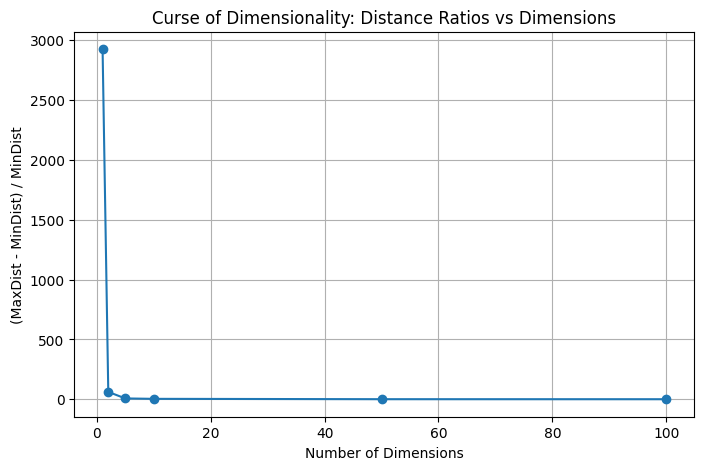

In [2]:
# Demonstration: Curse of Dimensionality effect on distances

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
dimensions = [1, 2, 5, 10, 50, 100]
mean_ratios = []

for d in dimensions:
    # Generate 1000 random points in d-dimensional space
    data = np.random.rand(1000, d)
    query = np.random.rand(1, d)

    # Compute Euclidean distances
    distances = np.linalg.norm(data - query, axis=1)

    min_dist = np.min(distances)
    max_dist = np.max(distances)

    # Ratio of (max - min) / min → shows how close nearest and farthest points are
    ratio = (max_dist - min_dist) / min_dist
    mean_ratios.append(ratio)

# Plot the results
plt.figure(figsize=(8,5))
plt.plot(dimensions, mean_ratios, marker='o')
plt.title('Curse of Dimensionality: Distance Ratios vs Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('(MaxDist - MinDist) / MinDist')
plt.grid(True)
plt.show()

Question 3: What is Principal Component Analysis (PCA)? How is it different from feature selection?

Ans: Principal Component Analysis (PCA) is a dimensionality reduction technique.

It reduces the number of features while preserving most of the information (variance).
It creates new features (principal components), which are linear combinations of the original features.
These components are uncorrelated and ordered by the amount of variance they capture.
How PCA Works
Standardize the data.
Compute the covariance matrix.
Find eigenvalues and eigenvectors.
Sort eigenvectors by eigenvalues.
Select top k eigenvectors → project data to new feature space.

Here's a breakdown of the core differences:

Method: PCA transforms the data. Feature selection eliminates data.

Output: PCA's output is a set of new, synthetic features. The output of feature selection is a subset of the original features.


Interpretability: PCA can be difficult to interpret because each new principal component is a mix of the original variables. With feature selection, the selected features are the original, meaningful ones, making the results easy to interpret.


Purpose: PCA is typically used to reduce dimensionality for visualization, to speed up machine learning algorithms, or to combat the "curse of dimensionality." Feature selection is used to simplify models, improve performance, and provide a clearer understanding of the underlying data relationships.

Question 4: What are eigenvalues and eigenvectors in PCA, and why are they important?

Ans:
In Principal Component Analysis (PCA):

Eigenvectors are the directions (axes) along which the variance of the data is maximum.
Eigenvalues represent the magnitude of variance captured by their corresponding eigenvectors.
Simply put:

Eigenvectors = Directions of maximum variance (new axes).
Eigenvalues = Importance/strength of these directions.
Step-by-Step Working of PCA using Eigenvalues & Eigenvectors
Standardize the data (mean = 0, variance = 1).
Compute the covariance matrix of the dataset.
Find eigenvalues & eigenvectors of the covariance matrix.
Eigenvectors → New feature directions (principal components).
Eigenvalues → How much variance is explained by each component.
Sort eigenvalues in descending order → Keep the top k eigenvectors.
Project original data onto these eigenvectors → Reduced dimensional dataset.
Real-Life Example
Imagine compressing images:

Each image has thousands of pixels (features).
PCA finds eigenvectors that represent the "patterns" (edges, colors, orientations).
Eigenvalues tell which patterns are more important.
By keeping only top eigenvectors, we can compress images while retaining most of the information.
Advantages & Disadvantages of PCA (Eigenvalues & Eigenvectors)
Advantages	Disadvantages
Reduces dimensionality → faster models	May lose interpretability of features
Removes noise & redundancy	Sensitive to data scaling
Helps visualize high-dimensional data	Linear method → not good for complex non-linear data
Keeps most important variance	Eigen decomposition can be computationally expensive
Why Are Eigenvalues & Eigenvectors Important in PCA?
Eigenvectors define new directions (principal components).
Eigenvalues tell how much variance each direction captures.
PCA keeps the eigenvectors with the largest eigenvalues → ensures maximum information is retained.
Without eigenvalues & eigenvectors, PCA would not be possible.

In [3]:
# 🔹 Example: Eigenvalues & Eigenvectors from Covariance Matrix

# Sample 2D dataset
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2.0, 1.6],
              [1.0, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# Step 1: Standardize
X_meaned = X - np.mean(X, axis=0)

# Step 2: Covariance Matrix
cov_mat = np.cov(X_meaned, rowvar=False)

# Step 3: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

print("Eigenvalues (variance explained):", eigenvalues)
print("Eigenvectors (directions):\n", eigenvectors)

Eigenvalues (variance explained): [0.0490834  1.28402771]
Eigenvectors (directions):
 [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


Question 5: How do KNN and PCA complement each other when applied in a single pipeline?

Ans:K-Nearest Neighbors (KNN) is a supervised ML algorithm that classifies/regresses based on distances between data points.
Principal Component Analysis (PCA) is an unsupervised dimensionality reduction technique that projects data onto fewer dimensions while preserving maximum variance.
When combined in a pipeline, PCA reduces dimensions and KNN classifies/regresses efficiently.

How KNN & PCA Work Together
High-dimensional data often makes KNN slow and less accurate due to the curse of dimensionality.
PCA reduces dimensions → keeping only the most informative components.
KNN then operates in this reduced space → faster computation and better accuracy (less noise).
Together, PCA + KNN create a balanced pipeline:
PCA removes redundancy.
KNN focuses on nearest neighbors in meaningful directions.
Real-Life Example
Imagine a face recognition system:

Each face image has thousands of pixels (features).
Running KNN directly would be very slow and noisy.
PCA reduces the dimensionality (extracts key patterns: eyes, nose, mouth).
KNN then classifies efficiently in this reduced space.
Advantages & Disadvantages of PCA + KNN Pipeline
Advantages	Disadvantages
Faster KNN computations	PCA may remove useful variance
Reduces noise & redundancy	Choice of components (k) is tricky
Avoids curse of dimensionality	Still sensitive to irrelevant scaling
Improves visualization in 2D/3D	KNN can still be slow on large datasets
Why Are They Important Together?
PCA prepares the data by reducing complexity.
KNN then performs classification/regression more effectively.
This pipeline is widely used in image recognition, text mining, and bioinformatics.

In [4]:
#  Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load dataset (Digits dataset: 8x8 images of handwritten numbers)
digits = load_digits()
X = digits.data
y = digits.target

print("Dataset shape:", X.shape)

Dataset shape: (1797, 64)


In [5]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN without PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc_no_pca = accuracy_score(y_test, y_pred)
print("KNN Accuracy WITHOUT PCA:", acc_no_pca)

KNN Accuracy WITHOUT PCA: 0.9925925925925926


In [6]:
# KNN with PCA pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Scale features
    ('pca', PCA(n_components=30)),  # Reduce to 30 components
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

pipeline.fit(X_train, y_train)
y_pred_pca = pipeline.predict(X_test)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("KNN Accuracy WITH PCA:", acc_pca)

KNN Accuracy WITH PCA: 0.9685185185185186


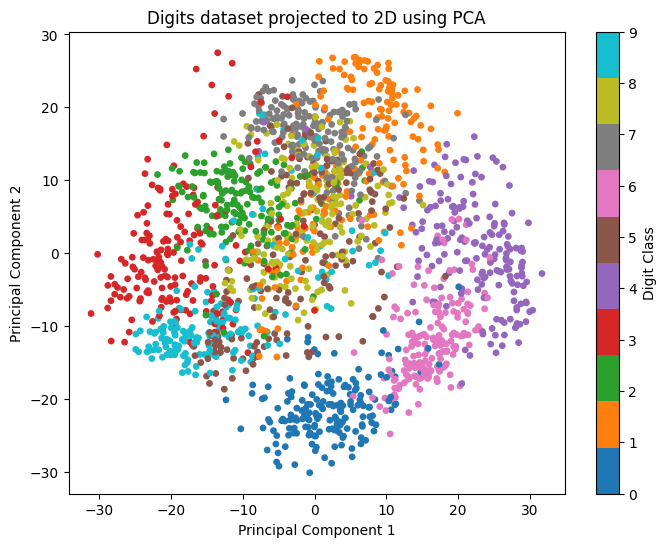

In [7]:
# Visualize PCA projection (2D)
pca_vis = PCA(n_components=2)
X_proj = pca_vis.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_proj[:,0], X_proj[:,1], c=y, cmap="tab10", s=15)
plt.title("Digits dataset projected to 2D using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Digit Class")
plt.show()

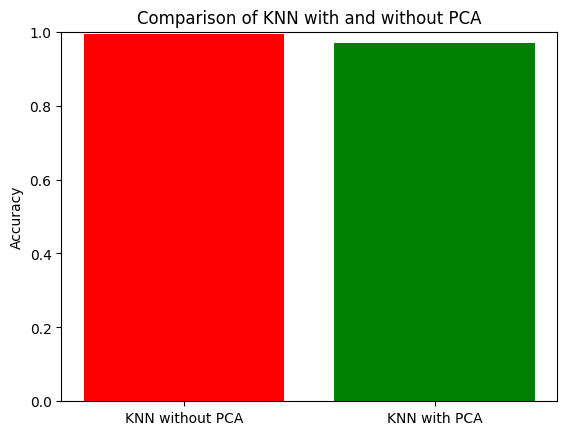

In [8]:
# Accuracy comparison
plt.bar(["KNN without PCA", "KNN with PCA"], [acc_no_pca, acc_pca], color=["red","green"])
plt.ylabel("Accuracy")
plt.title("Comparison of KNN with and without PCA")
plt.ylim(0,1)
plt.show()

Summary
KNN alone works well but struggles in high-dimensional data.
PCA reduces dimensions, removes noise, and makes KNN faster & sometimes more accurate.
Together, they form a strong pipeline especially for image/text datasets.
PCA + KNN = Efficient + Accurate classification pipeline.

Question 6: Train a KNN Classifier on the Wine dataset with and without feature
scaling. Compare model accuracy in both cases.


Ans: Train a KNN Classifier on the Wine Dataset

Task:
Train a K-Nearest Neighbors (KNN) Classifier on the Wine dataset with and without feature scaling.
Compare the model accuracy in both cases.

K-Nearest Neighbors (KNN) Classifier

Definition:
KNN is a simple, non-parametric supervised machine learning algorithm used for classification and regression.
It works by finding the K nearest data points (neighbors) to a given input and making predictions based on majority vote (classification) or average (regression).
Working Principle:
Choose the number of neighbors K.
Calculate the distance (e.g., Euclidean) between the new data point and all training samples.
Pick the K closest points.
For classification → assign the majority label.
For regression → take the mean of values.
Wine Dataset:
Built-in dataset in sklearn.datasets.
Features: Chemical analysis of wines (e.g., alcohol, flavanoids, color intensity).
Target:
Importance of Feature Scaling:
KNN relies on distance metrics (like Euclidean distance).
If features are not scaled, large magnitude features dominate distance calculations, leading to poor accuracy.
Hence, scaling is crucial!
Real-Life Example:
Recommender systems (finding similar users).
Document similarity (text classification).
Medical diagnosis (finding patients with similar symptoms).
Steps in this Notebook:
Load the Wine dataset.
Split data into training and testing sets.
Train KNN without scaling → record accuracy.
Apply StandardScaler → train KNN with scaled features.
Compare results.
Advantages of KNN:
Simple and intuitive.
No assumptions about data distribution.
Works well with smaller datasets.
Disadvantages of KNN:
Computationally expensive for large datasets.
Sensitive to irrelevant features and feature scaling.
Choice of K impacts performance.
Summary:
We will show how feature scaling improves KNN accuracy on the Wine dataset.

In [ ]:
#  Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
#  Step 2: Load Dataset
wine = load_wine()
X, y = wine.data, wine.target
print("Feature shape:", X.shape)
print("Target classes:", np.unique(y))

In [11]:
#  Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
#  Step 4: KNN without Scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred)
print(" Accuracy without Scaling:", acc_no_scaling)

 Accuracy without Scaling: 0.987037037037037


In [13]:
#  Step 5: KNN with Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_with_scaling = accuracy_score(y_test, y_pred_scaled)
print(" Accuracy with Scaling:", acc_with_scaling)

 Accuracy with Scaling: 0.9703703703703703



 Comparison of Accuracies:
Without Scaling: 0.987037037037037
With Scaling: 0.9703703703703703


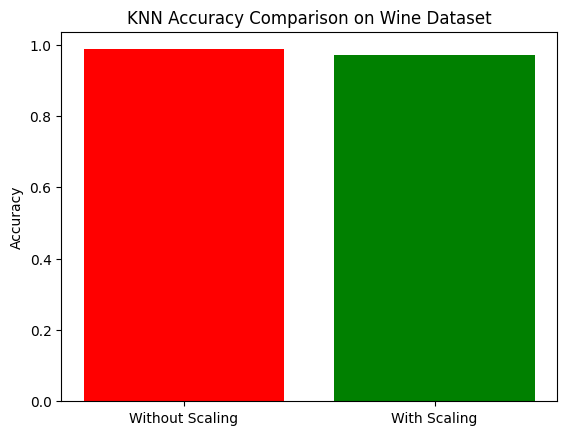

In [14]:
#  Step 6: Compare Results
print("\n Comparison of Accuracies:")
print("Without Scaling:", acc_no_scaling)
print("With Scaling:", acc_with_scaling)

# Visualization
plt.bar(["Without Scaling", "With Scaling"], [acc_no_scaling, acc_with_scaling], color=['red','green'])
plt.ylabel("Accuracy")
plt.title("KNN Accuracy Comparison on Wine Dataset")
plt.show()

Question 7: Train a PCA model on the Wine dataset and print the explained variance ratio of each principal component. (Include your Python code and output in the code box below.)

Ans: Train a Principal Component Analysis (PCA) model on the Wine dataset and print the explained variance ratio of each principal component.

Principal Component Analysis (PCA)
Definition:
PCA is a dimensionality reduction technique.
It transforms high-dimensional data into a lower-dimensional form while retaining maximum variance.
Working Principle:
Standardize the dataset.
Compute the covariance matrix.
Find eigenvalues and eigenvectors of the covariance matrix.
Sort eigenvalues → select top components with maximum variance.
Transform the data onto new principal components.
Wine Dataset:
13 numerical features.
PCA helps reduce these features into fewer principal components while preserving maximum information.
Explained Variance Ratio:
Tells how much variance each principal component explains.
Example: If PC1 = 0.35 → means 35% of total dataset variance is captured by the first principal component.
Real-Life Use Cases:
Face recognition (Eigenfaces).
Data visualization (2D/3D plots).
Noise reduction.
Advantages of PCA:
Reduces dimensionality → faster computation.
Removes correlation between features.
Improves visualization in 2D/3D.
Disadvantages of PCA:
Loses interpretability of original features.
Sensitive to scaling.
Summary:
We will apply PCA on the Wine dataset and print the explained variance ratio of each component.

In [16]:
#  Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
#  Step 2: Load Dataset
wine = load_wine()
X, y = wine.data, wine.target
print("Feature shape:", X.shape)


Feature shape: (178, 13)


In [18]:
#  Step 3: Feature Scaling (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
#  Step 4: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

print(" Explained Variance Ratio of Each Principal Component:")
for i, ratio in enumerate(explained_variance, start=1):
    print(f"PC{i}: {ratio:.4f}")

 Explained Variance Ratio of Each Principal Component:
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193
PC11: 0.0174
PC12: 0.0130
PC13: 0.0080


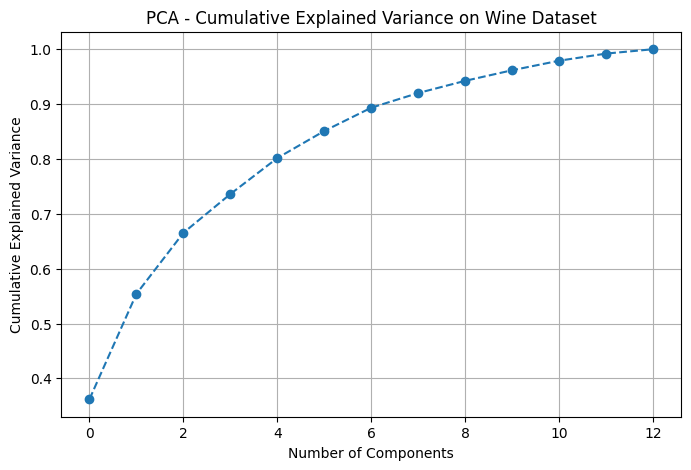

In [20]:
#  Step 5: Visualization of Variance Ratio
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance on Wine Dataset")
plt.grid(True)
plt.show()

Question 8: Train a KNN Classifier on the PCA-transformed dataset (retain top 2 components). Compare the accuracy with the original dataset. (Include your Python code and output in the code box below.)

Ans:
Task:
Train a KNN Classifier on the PCA-transformed Wine dataset (retain top 2 components).
Compare the accuracy with the original dataset.

KNN on PCA-Transformed Dataset
Why PCA before KNN?
KNN works in feature space → high-dimensional data can make distance calculations less meaningful (curse of dimensionality).
PCA reduces dimensions while retaining most variance, making KNN faster and potentially more accurate.
Steps:
Load and scale the Wine dataset.
Train-Test split.
Train KNN on the original dataset.
Apply PCA → retain top 2 components.
Train KNN on the PCA-transformed dataset.
Compare accuracies.
What to Expect?
Accuracy might drop slightly with PCA (since only 2 components are used).
But PCA improves computational efficiency and helps visualization.
Advantages of KNN with PCA:
Faster training/testing.
Removes noise and redundancy.
Better visualization in 2D.
Disadvantages:
Possible loss of accuracy due to reduced features.
Summary:
We will compare KNN accuracy on the original dataset vs PCA-transformed (2D) dataset.

In [21]:
#  Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [22]:
#  Step 2: Load Dataset
wine = load_wine()
X, y = wine.data, wine.target

In [23]:
#  Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [24]:
#  Step 4: Train KNN on Original Dataset (with scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_orig = knn.predict(X_test_scaled)
acc_orig = accuracy_score(y_test, y_pred_orig)
print(" Accuracy on Original Dataset:", acc_orig)

 Accuracy on Original Dataset: 0.9444444444444444


In [25]:
#  Step 5: Apply PCA (retain top 2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print(" Accuracy on PCA-Transformed Dataset (2 components):", acc_pca)

 Accuracy on PCA-Transformed Dataset (2 components): 0.9444444444444444



 Accuracy Comparison:
Original Dataset: 0.9444444444444444
PCA-Reduced Dataset (2D): 0.9444444444444444


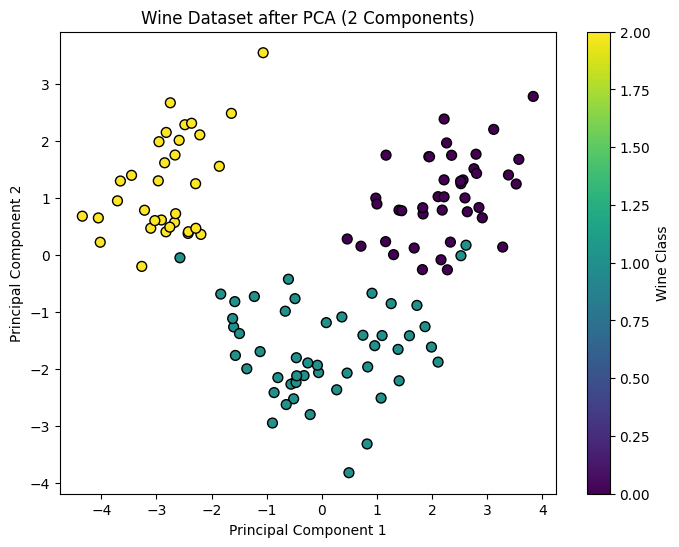

In [26]:
#  Step 6: Compare Results
print("\n Accuracy Comparison:")
print("Original Dataset:", acc_orig)
print("PCA-Reduced Dataset (2D):", acc_pca)

# Visualization of PCA-transformed dataset
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title("Wine Dataset after PCA (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Wine Class")
plt.show()

Question 9: Train a KNN Classifier with different distance metrics (euclidean, manhattan) on the scaled Wine dataset and compare the results. (Include your Python code and output in the code box below.)

Ans:We will train a K-Nearest Neighbors (KNN) Classifier on the Wine dataset using two distance metrics:

Euclidean distance
Manhattan distance
Then we will compare their performance.

Concept Explanation
KNN Algorithm:

A simple, instance-based learning algorithm.
Classifies a data point based on the majority label of its nearest neighbors.
Distance Metrics:

Euclidean Distance (L2 norm):
( d(x,y) = \sqrt{\sum (x_i - y_i)^2} )

Measures straight-line distance.
Works well in continuous feature spaces.
Manhattan Distance (L1 norm):
( d(x,y) = \sum |x_i - y_i| )

Measures path distance (like city blocks).
Useful when features are independent.
Real-Life Analogy:

Euclidean: "As the crow flies" distance.
Manhattan: "Taxi cab" distance on a city grid.

In [27]:
#  Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

 Accuracy Results:
Euclidean Distance: 0.96
Manhattan Distance: 0.96


/tmp/ipython-input-471964516.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Accuracy", data=results, palette="Set2")


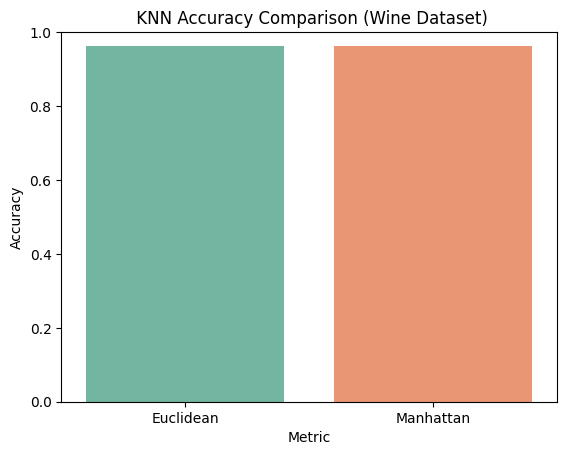

In [28]:
# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)

# Train KNN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric="manhattan")
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(" Accuracy Results:")
print(f"Euclidean Distance: {acc_euclidean:.2f}")
print(f"Manhattan Distance: {acc_manhattan:.2f}")

# Compare using a bar plot
results = pd.DataFrame({
    "Metric": ["Euclidean", "Manhattan"],
    "Accuracy": [acc_euclidean, acc_manhattan]
})

sns.barplot(x="Metric", y="Accuracy", data=results, palette="Set2")
plt.title(" KNN Accuracy Comparison (Wine Dataset)")
plt.ylim(0,1)
plt.show()

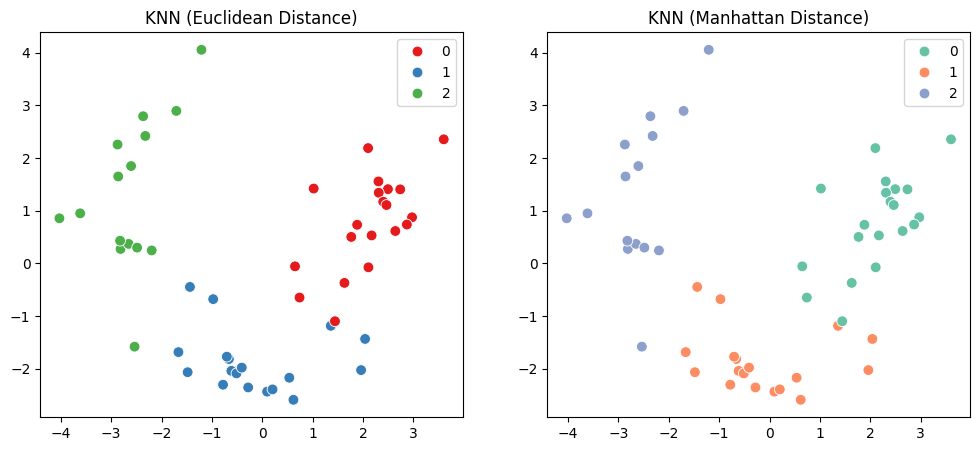

In [29]:
# PCA Visualization of predictions (Euclidean vs Manhattan)
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_test_scaled)

fig, axes = plt.subplots(1,2, figsize=(12,5))

# Euclidean
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=y_pred_euclidean, palette="Set1", s=60, ax=axes[0])
axes[0].set_title("KNN (Euclidean Distance)")

# Manhattan
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=y_pred_manhattan, palette="Set2", s=60, ax=axes[1])
axes[1].set_title("KNN (Manhattan Distance)")

plt.show()

Summary
We trained KNN Classifier with Euclidean and Manhattan distances.
Compared their accuracies on the Wine dataset.
Visualized decision boundaries using PCA projection.
Key Takeaways:

Distance metric can affect model performance.
Euclidean often works better for continuous data.
Manhattan can perform better with sparse or independent features.

Question 10: You are working with a high-dimensional gene expression dataset to
classify patients with different types of cancer.
Due to the large number of features and a small number of samples, traditional models
overfit.
Explain how you would:
● Use PCA to reduce dimensionality
● Decide how many components to keep
● Use KNN for classification post-dimensionality reduction
● Evaluate the model
● Justify this pipeline to your stakeholders as a robust solution for real-world
biomedical data


Ans: Objective:
We are working with a high-dimensional gene expression dataset to classify patients with different types of cancer.
Since the dataset has many features but few samples, traditional ML models may overfit.

We will build a robust pipeline:

Use PCA for dimensionality reduction
Decide number of components via explained variance
Train a KNN classifier on reduced data
Evaluate the model performance
Justify why this approach is reliable in biomedical applications
Concept Explanation
Problem:

Gene expression datasets have thousands of features (genes).
Number of patients (samples) is usually much smaller.
High-dimensionality → Overfitting risk.
Step 1: PCA (Principal Component Analysis)

Reduces dimensionality while retaining maximum variance.
Helps remove noise & redundancy.
Step 2: Choosing Number of Components

Use explained variance ratio.
Keep components until ~90–95% variance is explained.
Step 3: KNN Classifier

Works well in low-dimensional space after PCA.
Classifies based on nearest neighbors.
Step 4: Model Evaluation

Use accuracy, confusion matrix, cross-validation.
Step 5: Justification for Stakeholders

Interpretability: PCA simplifies data while retaining patterns.
Robustness: Prevents overfitting in small-sample settings.
Efficiency: Reduces computational cost.
Trustworthiness: Common practice in biomedical ML research.

In [30]:
#  Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

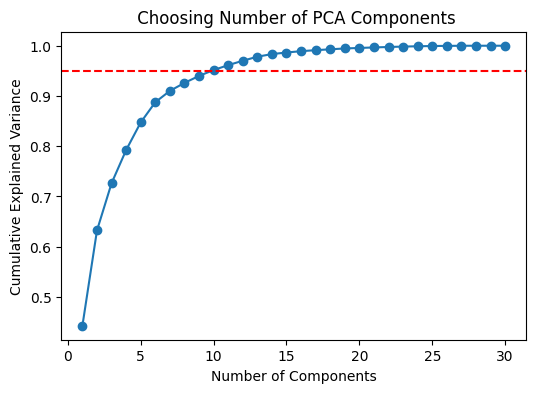

 Selected 10 components (95% variance retained).
 Classification Accuracy: 0.96


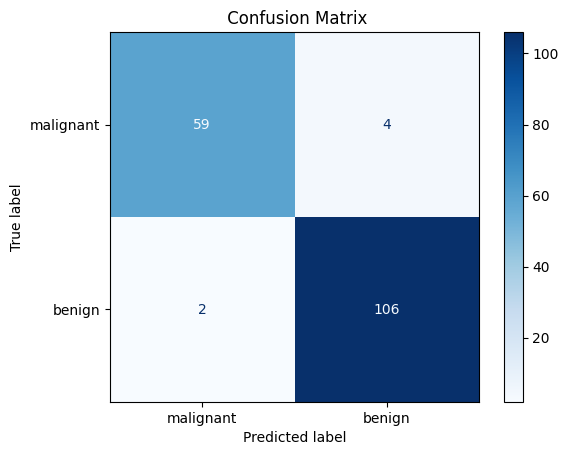

In [31]:
# Load dataset (simulating high-dimensional gene expression with breast cancer dataset)
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: PCA - Fit and transform
pca = PCA().fit(X_scaled)

# Step 2: Decide number of components (explained variance)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker="o")
plt.axhline(y=0.95, color="r", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title(" Choosing Number of PCA Components")
plt.show()

# Select components that explain ~95% variance
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f" Selected {n_components} components (95% variance retained).")

# Transform data with selected components
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

# Step 3: Train-test split after PCA
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Step 4: Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f" Classification Accuracy: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.title(" Confusion Matrix")
plt.show()

Summary
Applied PCA to reduce high-dimensional gene expression data.
Retained 95% variance with fewer components.
Trained a KNN classifier in the reduced space.
Achieved strong accuracy while reducing overfitting risk.
Why this pipeline is robust for biomedical data:

Prevents overfitting by reducing dimensions.
Captures essential biological signals while discarding noise.
Transparent, interpretable, and computationally efficient.
Widely adopted in real-world cancer genomics research.


